In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
from plotly.figure_factory import create_table

In [2]:
#------------------
#Hyper parameters
#------------------

mpl.style.use('ggplot')
# inpDir = 'asp'
# subDir = ''

RANDOM_STATE=24
np.random.seed(RANDOM_STATE)

irisFile = "asp/iris.csv"


In [3]:
iris_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

iris_df = pd.read_csv(irisFile, skiprows=1, names=iris_features)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


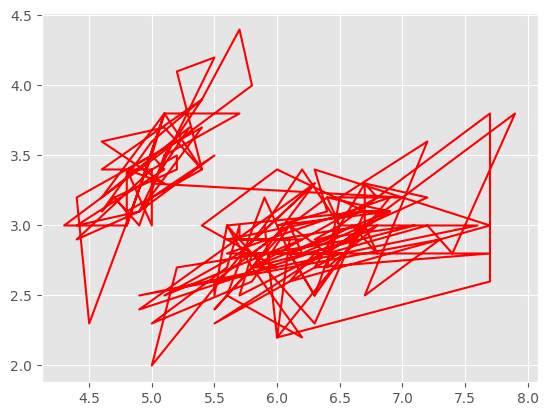

In [4]:
plt.plot(iris_df.sepal_length, iris_df.sepal_width, color='red')
plt.show()

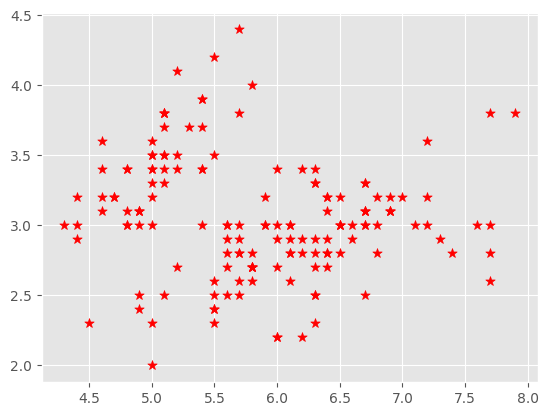

In [5]:
plt.scatter(iris_df.sepal_length, iris_df.sepal_width, color='red', marker='*',s=50)
plt.show()

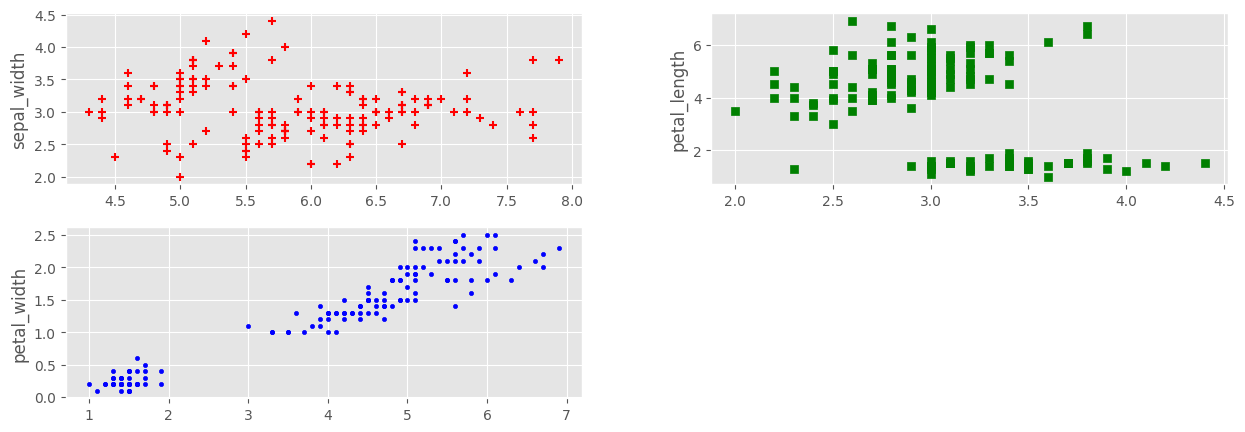

In [6]:
colors =['r','g','b','k']
markers = ['+',',','.','o']

plt.figure(figsize=(15,5))
plt.subplots_adjust(wspace=0.25 , hspace=0.25 )

for ii in range(3):
    plt.subplot(2,2,ii+1)

    col1=iris_df.columns[ii]
    col2=iris_df.columns[ii+1]

    plt.scatter(iris_df[col1],iris_df[col2],color = colors[ii],marker=markers[ii])
    plt.ylabel(iris_features[ii+1])


In [7]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


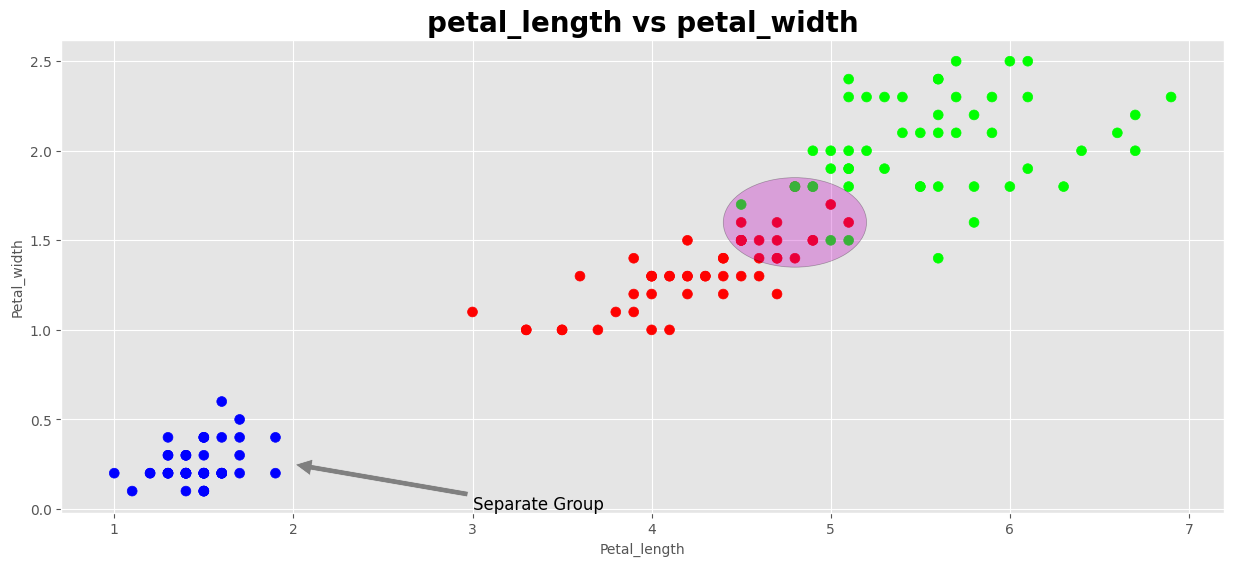

In [8]:
from matplotlib.patches import Ellipse
x_axis =2 
y_axis =3

x_label = iris_features[x_axis]
y_label = iris_features[y_axis]

plt.figure(figsize=(15,12))
ax = plt.subplot(1,1,1,aspect='equal')

plt.scatter(iris_df[x_label], iris_df[y_label], c = iris_df['target'], cmap='brg', s=50)

plt.xlabel(x_label.capitalize(), fontsize = 10)
plt.ylabel(y_label.capitalize(), fontsize = 10)

plt.title(f'{x_label} vs {y_label}', fontsize=20, fontweight='bold')


plt.annotate('Separate Group', xy=(2,0.25), xytext=(3,0),arrowprops=dict(facecolor='gray', shrink=0.01, 
                                                                         connectionstyle='arc3'),fontsize=12)


ellipse = Ellipse(xy=(4.8,1.6), width=0.8, height=0.5, angle=0)
ellipse.set_clip_box(ax.bbox)
ellipse.set_facecolor('m')
ellipse.set_alpha(0.3)
ellipse.set_edgecolor('k')

ax.add_patch(ellipse)

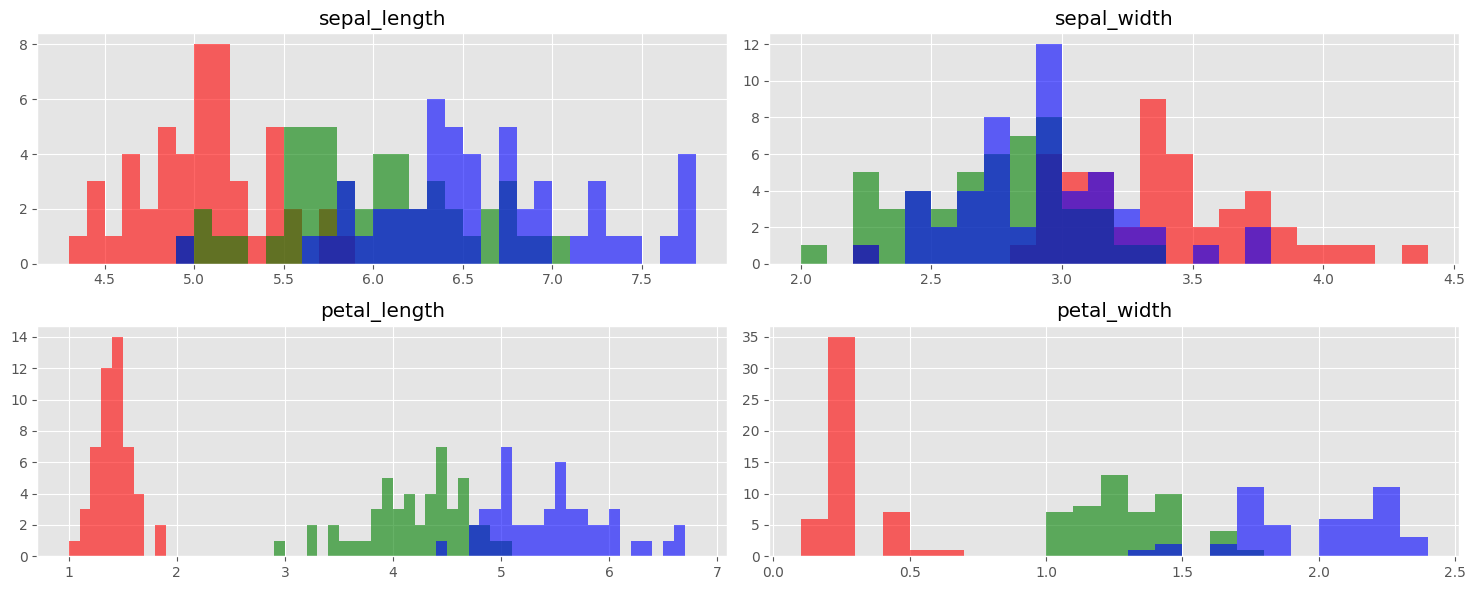

In [9]:
binwidth = 0.1
fig, axes = plt.subplots(2,2, figsize = (15,6))
colors = ['r','g','b']

axes = axes.flat

jj = 0
for ax in axes:
    for ii in range (3):
        start_bin = iris_df[iris_features[jj]].min()
        end_bin = iris_df[iris_features[jj]].max()
        bins = np.arange(start_bin,end_bin, binwidth ) 
        X1 = iris_df[iris_features[jj]][iris_df['target']== ii ]
        ax.hist(X1,bins =bins,histtype='bar',color=colors[ii],alpha=0.6 )
    ax.set_title(iris_features[jj])
    jj+=1

plt.tight_layout()

Text(0.5, 1.0, 'Diff Sample Size')

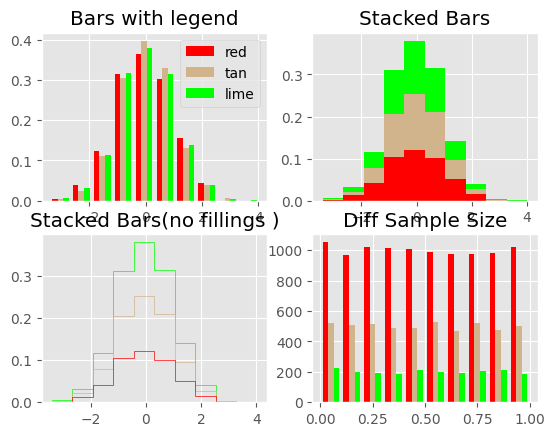

In [10]:
n_bins = 10
x = np.random.randn(1000,3)

fig, axes = plt.subplots(2,2)

axes = axes.ravel()
colors = ['red','tan','lime']
ax=axes[0]

ax.hist(x,n_bins,density= True, histtype='bar',color= colors, label = colors)

ax.legend(prop={'size':10})
ax.set_title('Bars with legend')

ax=axes[1]

ax.hist(x,n_bins,density= True, histtype='bar',color= colors, label = colors, stacked= True)
ax.set_title('Stacked Bars')

ax=axes[2]

ax.hist(x,n_bins,density= True, histtype='step',color= colors, label = colors, stacked= True,fill=False)
ax.set_title('Stacked Bars(no fillings )')

ax=axes[3]

x_multi = [np.random.rand(n) for n in [10000,5000,2000]]
ax.hist(x_multi,n_bins,histtype='bar',color= colors)
ax.set_title('Diff Sample Size')


# BOX PLOT

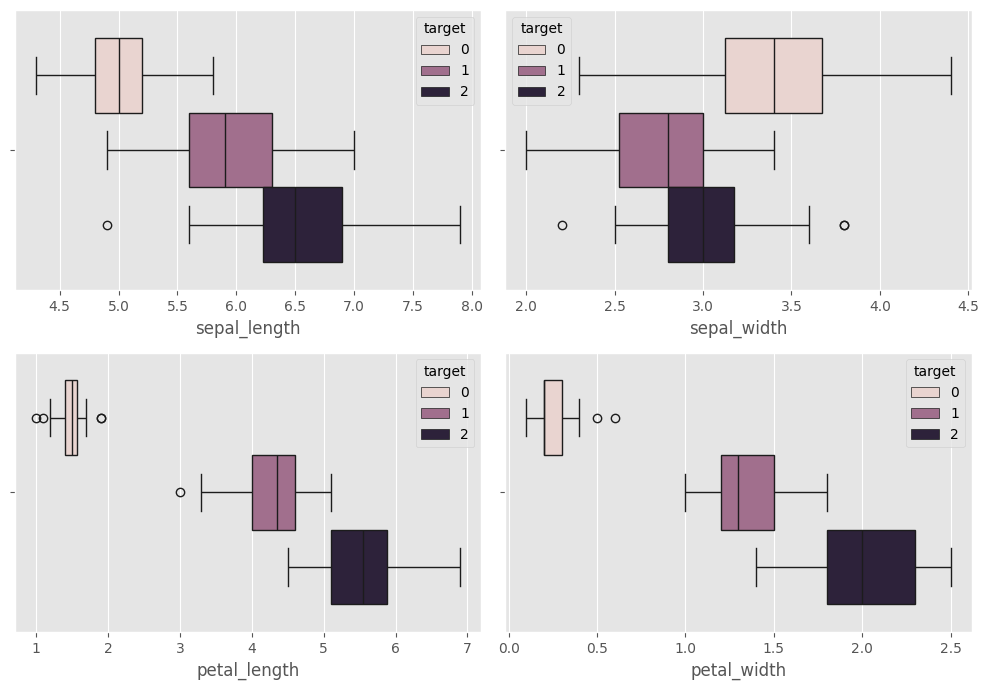

In [11]:
fig,axes = plt.subplots(2,2, figsize=(10,7))

axes =axes.ravel()

for count, ax in enumerate(axes):
    sns.boxplot(data=iris_df, x=iris_features[count], hue= 'target', ax=ax)

plt.tight_layout()
plt.show()

In [12]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
iris_features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target']

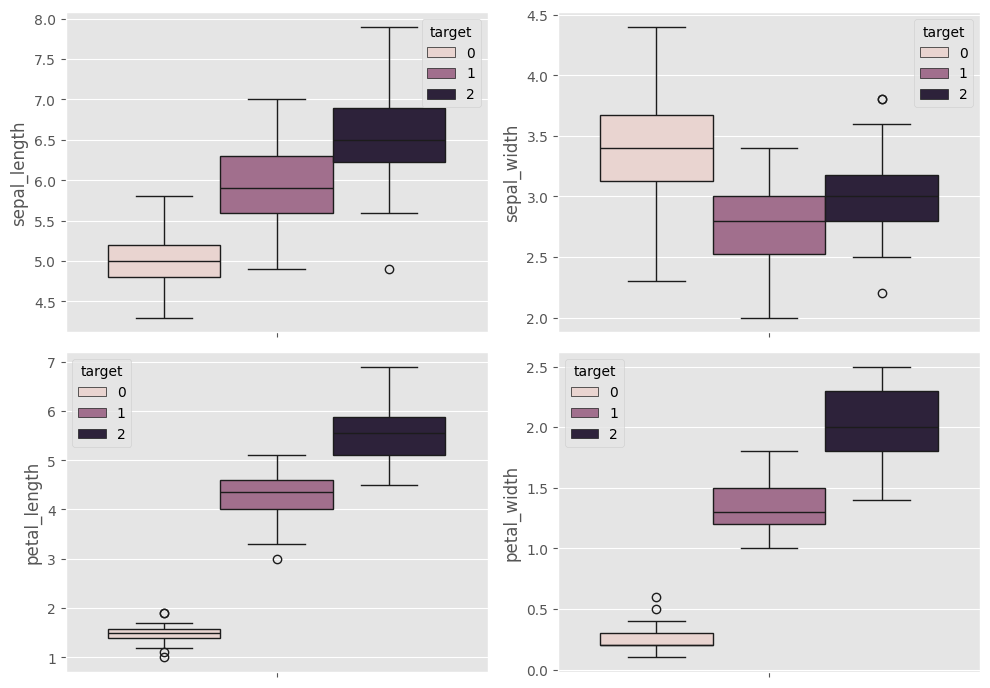

In [14]:
fig,axes = plt.subplots(2,2, figsize=(10,7))

axes =axes.ravel()

for count, ax in enumerate(axes):
    sns.boxplot(data=iris_df, y=iris_features[count], hue= 'target', ax=ax)

plt.tight_layout()
plt.show()

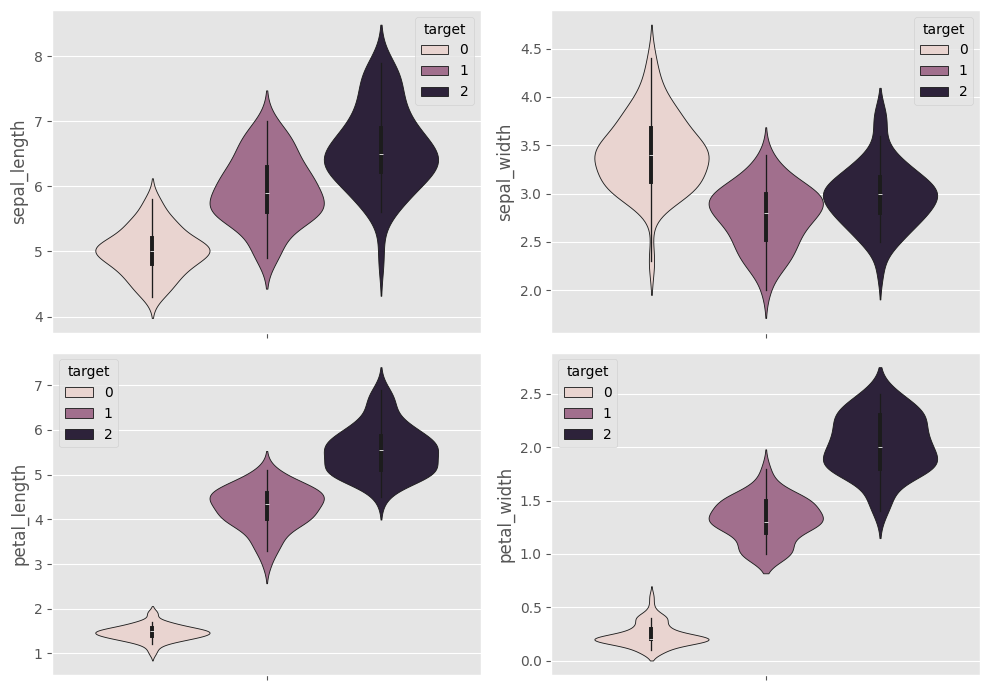

In [15]:
fig,axes = plt.subplots(2,2, figsize=(10,7))

axes =axes.ravel()

for count, ax in enumerate(axes):
    sns.violinplot(data=iris_df, y=iris_features[count], hue= 'target', ax=ax)

plt.tight_layout()
plt.show()

In [16]:
fig = px.line(iris_df,x=iris_features[0],y=iris_features[1],title=f'Iris',color="target")
fig.show()

In [17]:
fig = px.histogram(iris_df,x=iris_features[0],y=iris_features[1],histnorm =f'probability density',nbins= 50,width=600,height=400)
fig.show()

In [18]:
data_df = px.data.gapminder()
data_df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [19]:
table = create_table(data_df.head(20))
py.iplot(table)

In [20]:
country_data = px.data.gapminder().query("country=='India'")

fig = px.bar(country_data, x = 'year', y='pop', height=400)
fig.show()

In [21]:
count = px.data.gapminder().query("country == 'India'")
fig =px. bar(country_data,x='year',y='pop',labels={'pop':'Population Of India'},color='lifeExp',height=800)
fig.show()

In [22]:
gm2007 = data_df.query("year==2007")
fig = px.scatter(gm2007,x='gdpPercap',y='lifeExp',color='continent',size='pop',size_max=60,hover_name='country',facet_col='continent',height=600,width=1200)
fig.show()

In [23]:
fig = px.scatter(data_df,x='gdpPercap',y='lifeExp',color='country',size='pop',size_max=60,animation_frame='year',
                 animation_group='country',hover_name='country',range_x=[25,10000],range_y=[25,90],height=600,width=1200)
fig.show()

In [24]:
from plotnine import ggplot,aes,geom_point,labs,geom_histogram

In [28]:
scatter_plot = (ggplot(iris_df,aes=(x_axis==iris_features[0],y_axis==iris_features[1]),color='target'))
+ geom_point(size=3)+labs(title=f'{iris_features[0]} vs.{iris_features[1]}',x=iris_features[0],y=iris_features[1])
scatter_plot.show()

TypeError: ggplot.__init__() got an unexpected keyword argument 'aes'